# Practica 3 Sistemas de Recomendacion KDtree

Primero vamos a proceder con la lectura de la base de datos, se esta creando un diccionario de diccionarios para hacer el proceso mas rapido y no usar valores Nan que nos son perjudiciales

In [1]:
from math import *
import pandas as pd
import numpy as np

ratingDf=pd.read_csv("ratings.csv")
moviesDf=pd.read_csv("movies.csv")
users=dict()

arr=np.array(ratingDf.iloc[:,])
arrMov=np.array(moviesDf.iloc[:,])

#diccionario de rating
for i in arr:
    userId, movieId = int(i[0]), int(i[1])
    rating = float(i[2])
    if userId not in users:
        users[userId] = {movieId: rating}
    else:
        users[userId][movieId] = rating

movies=dict()
#diccionario de peliculas
for i in arrMov:
    movieId = int(i[0])
    movieTitle = i[1]
    movies[movieId] = movieTitle

print("Completado")

Completado


Se han leido los datos y se han creado dos diccionarios, primero un diccionario de diccionarios, para las peliculas y los ratings, luego se ha creado un diccionario para almacenar los nombres de las peliculas

In [33]:
print("Cantidad de usuarios")
print(len(users))
print("Cantidad de peliculas")
print(len(movies))
print("Nro Registros promedio por pelicula")
promedio=0
for i in users:
    promedio=promedio+len(users[i])
print(promedio/len(users))
print("Porcentaje de uso %")
print( (promedio/len(users))*100/len(movies))

Cantidad de usuarios
610
Cantidad de peliculas
9742
Nro Registros promedio por pelicula
165.30491803278687
Porcentaje de uso %
1.6968273253211545


In [37]:
print("Cantidad de usuarios")
print(len(users))
print("Cantidad de peliculas")
print(len(movies))
print("Nro Registros promedio por pelicula")
promedio=0
maximo=0
minimo=len(movies)
id_max=0
id_min=0
for i in users:
    promedio=promedio+len(users[i])
    if len(users[i])>maximo:
        maximo=len(users[i])
        id_max=i
    if len(users[i])<minimo:
        minimo=len(users[i])
        id_min=i
print(promedio/len(users))
print("Porcentaje de uso %")
print( (promedio/len(users))*100/len(movies))
print("Minimo %")
print(minimo)
print((minimo)*100/len(movies))
print("Maximo %")
print(maximo)
print((maximo)*100/len(movies))
print(id_max)
print(id_min)

Cantidad de usuarios
610
Cantidad de peliculas
9742
Nro Registros promedio por pelicula
165.30491803278687
Porcentaje de uso %
1.6968273253211545
Minimo %
20
0.20529665366454528
Maximo %
2698
27.694518579347157
414
53


Contamos con es cantidad de movies en la base de datos

### Definimos la Funcion Cosenos

Esta funcion no es mas que la definicion del producto punto entre dos vectores, por ello es que hay que tener cuidado en algunos casos, los cuales implementamos ahora:

Primero si no hay coincidencia entre dos vectores, si ninguna de sus componentes coinciden y todos son Nan o no hay datos, el valor que inicialmente se le da es de 0, sin embargo esto no es valido, por ello escojimos un valor que este fuera de los angos posibles para el estudio y que represente nuestro valor "no hubo coincidencias", si usamos Nan despues no vamos a poder ordenar los valores, se tuvo cuidado con eso tambien.

In [3]:
def cosine(dicc1, dicc2):
    xy=0
    xx=0
    yy=0
    ing=True

    for i in dicc1:
        if i in dicc2:
            xy=xy+dicc1[i]*dicc2[i]
            xx=xx+dicc1[i]*dicc1[i]
            yy=yy+dicc2[i]*dicc2[i]
            ing=False
    
    if xx==0 or yy==0 or ing:
        ang=-100
    else:
        ang=xy/(sqrt(xx)*sqrt(yy))
    return ang

### Definimos la Funcion Pearson

De la misma manera cuando no tiene nada en comun da -100, esto se justifica ya que en cualquiera de las metricas o correlaciones no es posible obtener -100 amenos de no tener ninguna coincidencia.

In [4]:
def pearson(dicc1,dicc2):
    xy=0
    x=0
    y=0
    xx=0
    yy=0
    n=0
    
    for i in dicc1:
        if i in dicc2:
            n=n+1
            xy=xy+dicc1[i]*dicc2[i]
            x=x+dicc1[i]
            y=y+dicc2[i]
            xx=xx+dicc1[i]*dicc1[i]
            yy=yy+dicc2[i]*dicc2[i]
            
    if n==0:
        r=-100
    else:
        if sqrt(xx-(x*x/n))==0 or sqrt(yy-(y*y/n))==0:
            r=-1
        else:
            r=(xy-((x*y)/n))/(sqrt(xx-(x*x/n))*sqrt(yy-(y*y/n)))
    return r

### Definimos la Funcion Manhathan

In [5]:
def manhathan(dicc1, dicc2):
    distance = 0.0
    ing=True
    for i in dicc1:
        if i in dicc2:
            distance = distance + abs(dicc1[i] - dicc2[i])
            ing=False
    if ing:
        return -100
    else:
        return distance

### Definimos la Funcion Euclidean

In [6]:
def euclidean(dicc1, dicc2):
    distance = 0.0
    ing=True
    for i in dicc1:
        if i in dicc2:
            distance += (dicc1[i] - dicc2[i])**2 
            ing=False
    if ing:
        return -100
    else:
        return sqrt(distance)

### Pruebas de Valores 

In [7]:
row0=1
row1=580
distance = manhathan(users[row0], users[row1])
print(distance)

66.5


### Pruebas de Tiempo

Para las pruebas de tiempo se usaron un cierto numero de valores para cada una de las funciones, anotando los tiempos demorados para poder graficarlos.

In [8]:
from time import time
import matplotlib.pyplot as plt

In [9]:
#euclidean  manhathan  pearson  cosine
t_manhathan=[]
cantidad=[]
indice=0

for i in users:
    cantidad.append(indice)
    start_time = time()
    for j in users:
        distance = manhathan(users[i], users[j])
    t_manhathan.append(time()-start_time)
    indice=indice+1

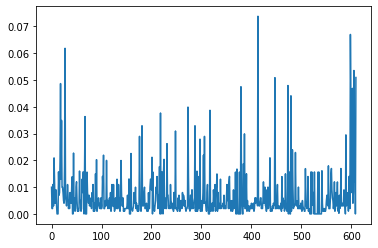

In [10]:
plt.plot(cantidad,t_manhathan, label='linear')

In [11]:
#euclidean  manhathan  pearson  cosine
t_euclidean=[]
cantidad=[]
indice=0

for i in users:
    cantidad.append(indice)
    start_time = time()
    for j in users:
        distance = euclidean(users[i], users[j])
    t_euclidean.append(time()-start_time)
    indice=indice+1

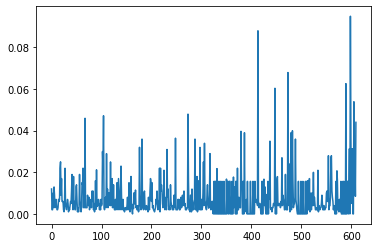

In [12]:
plt.plot(cantidad,t_euclidean, label='linear')

In [47]:
#euclidean  manhathan  pearson  cosine
t_pearson=[]
cantidad=[]
indice=0
sumatoria=0

for i in users:
    cantidad.append(indice)
    start_time = time()
    for j in users:
        distance = pearson(users[i], users[j])
    tiem=time()-start_time
    t_pearson.append(tiem)
    sumatoria=sumatoria+tiem
    indice=indice+1

print(sumatoria/indice)

0.008816592028883637


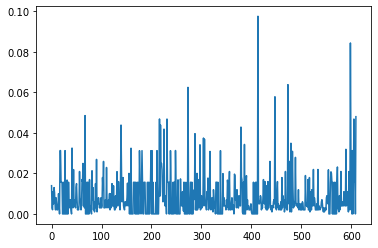

In [48]:
plt.plot(cantidad,t_pearson, label='linear')

In [15]:
#euclidean  manhathan  pearson  cosine
t_cosine=[]
cantidad=[]
indice=0

for i in users:
    cantidad.append(indice)
    start_time = time()
    for j in users:
        distance = cosine(users[i], users[j])
    t_cosine.append(time()-start_time)
    indice=indice+1

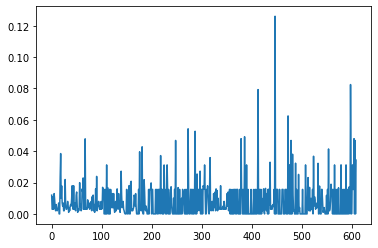

In [16]:
plt.plot(cantidad,t_cosine, label='linear')

In [40]:
#euclidean  manhathan  pearson  cosine
t_m=[]
cantidad=[]
indice=0
elemento=414

for j in users:
    start_time = time()
    cantidad.append(indice)
    distance = manhathan(users[elemento], users[j])
    t_m.append(time()-start_time)
    indice=indice+1

print(sum(t_m)/len(t_m))

0.00011444717157082479


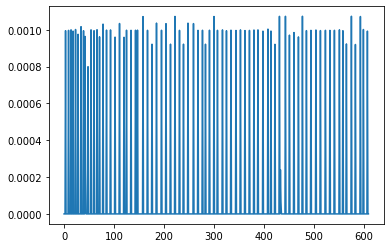

In [39]:
plt.plot(cantidad,t_m, label='linear')

In [43]:
#euclidean  manhathan  pearson  cosine
t_m=[]
cantidad=[]
indice=0
elemento=53

for j in users:
    start_time = time()
    cantidad.append(indice)
    distance = manhathan(users[elemento], users[j])
    t_m.append(time()-start_time)
    indice=indice+1

print(sum(t_m)/len(t_m))

1.6349260924292392e-06


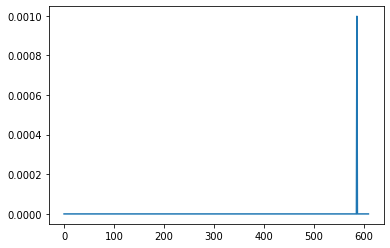

In [44]:
plt.plot(cantidad,t_m, label='linear')

### Buscar vecinos

In [9]:
def get_neighbors(users,id_test,distancia):
    distances = list()
    for i in users:
        if (i!=id_test):
            dist = distancia(users[i],users[id_test])
            if dist!=-100:
                distances.append((i,dist))
    distances.sort(key=lambda tup: tup[1])
    return distances

### KNN

In [10]:
def knn(result,users,persona,vecinos,distancia,umbral):
    neighbors = get_neighbors(users,persona,distancia)
    contador=0
    
    #euclidean  manhathan  pearson  cosine
    if distancia==euclidean or distancia==manhathan:
        for i in range( len(users.keys()) ):
            #if neighbors[i][1]>umbral:
            print("id: "+str(neighbors[i][0]+1)+" distancia: "+str(neighbors[i][1]))
            result[neighbors[i][0]+1] =neighbors[i][1]
            contador=contador+1
            if contador==vecinos:
                break
    else:
        for i in range( len(users.keys()) ):
            #if neighbors[i][1]>umbral:
            print("id: "+str(neighbors[len(neighbors)-i-1][0]+1)+" distancia: "+str(neighbors[len(neighbors)-i-1][1]))
            result[neighbors[len(neighbors)-i-1][0]+1] = neighbors[len(neighbors)-i-1][1]
            contador=contador+1
            if contador==vecinos:
                break

In [16]:
#Nro de vecinos más cercanos, Función de Distancia (Manhattan, Euclides, Pearson, Coseno)
#Id. ó nombre de usuario , Umbral
#euclidean  manhathan  pearson  cosine
persona = 580
vecinos=15
umbral=0

result=dict()
knn(result,users,persona,vecinos,euclidean,umbral)

id: 208 distancia: 0.7071067811865476
id: 359 distancia: 1.0
id: 551 distancia: 1.224744871391589
id: 576 distancia: 1.224744871391589
id: 195 distancia: 1.3228756555322954
id: 325 distancia: 1.3228756555322954
id: 506 distancia: 1.3228756555322954
id: 596 distancia: 1.4142135623730951
id: 13 distancia: 1.5
id: 548 distancia: 1.5
id: 93 distancia: 1.5811388300841898
id: 509 distancia: 1.5811388300841898
id: 569 distancia: 1.5811388300841898
id: 282 distancia: 1.6583123951777
id: 107 distancia: 1.7320508075688772


In [17]:
#Nro de vecinos más cercanos, Función de Distancia (Manhattan, Euclides, Pearson, Coseno)
#Id. ó nombre de usuario , Umbral
#euclidean  manhathan  pearson  cosine
persona = 580
vecinos=15
umbral=0
#580

result=dict()
knn(result,users,persona,vecinos,manhathan,umbral)

id: 208 distancia: 1.0
id: 359 distancia: 1.0
id: 93 distancia: 2.0
id: 279 distancia: 2.0
id: 551 distancia: 2.0
id: 576 distancia: 2.0
id: 596 distancia: 2.0
id: 13 distancia: 2.5
id: 176 distancia: 2.5
id: 195 distancia: 2.5
id: 282 distancia: 2.5
id: 325 distancia: 2.5
id: 506 distancia: 2.5
id: 548 distancia: 2.5
id: 128 distancia: 3.0


In [13]:
#Nro de vecinos más cercanos, Función de Distancia (Manhattan, Euclides, Pearson, Coseno)
#Id. ó nombre de usuario , Umbral
#euclidean  manhathan  pearson  cosine
persona = 580
vecinos=10
umbral=0
#580

result=dict()
knn(result,users,persona,vecinos,pearson,umbral)

id: 13 distancia: 1.000000000000002
id: 93 distancia: 1.0
id: 176 distancia: 0.9999999999999999
id: 208 distancia: 0.9819805060619665
id: 88 distancia: 0.967805338634416
id: 148 distancia: 0.9449111825230488
id: 506 distancia: 0.9379366108168804
id: 551 distancia: 0.9045340337332909
id: 548 distancia: 0.8728715609439696
id: 195 distancia: 0.8703882797784892


In [14]:
#Nro de vecinos más cercanos, Función de Distancia (Manhattan, Euclides, Pearson, Coseno)
#Id. ó nombre de usuario , Umbral
#euclidean  manhathan  pearson  cosine
persona = 580
vecinos=10
umbral=0
#580

result=dict()
knn(result,users,persona,vecinos,cosine,umbral)

id: 13 distancia: 0.9996081120648961
id: 208 distancia: 0.9980723012298871
id: 506 distancia: 0.996525328643134
id: 455 distancia: 0.9951152672684376
id: 107 distancia: 0.994998372086408
id: 359 distancia: 0.9946830503370405
id: 583 distancia: 0.9944092912769698
id: 401 distancia: 0.9941436380819285
id: 548 distancia: 0.9941090093171839
id: 294 distancia: 0.9940516516415969


In [18]:
def knn(result,users,persona,vecinos,distancia,umbral):
    neighbors = get_neighbors(users,persona,distancia)
    contador=0
    
    #euclidean  manhathan  pearson  cosine
    if distancia==euclidean or distancia==manhathan:
        for i in range( len(users.keys()) ):
            #if neighbors[i][1]>umbral:
            result[neighbors[i][0]+1] =neighbors[i][1]
            contador=contador+1
            if contador==vecinos:
                break
    else:
        for i in range( len(users.keys()) ):
            #if neighbors[i][1]>umbral:
            result[neighbors[len(neighbors)-i-1][0]+1] = neighbors[len(neighbors)-i-1][1]
            contador=contador+1
            if contador==vecinos:
                break
                
def recomendacion(users,persona,vecinos,distancia,umbral,nro_peliculas):
    result=dict()
    knn(result,users,persona,vecinos,distancia,umbral)
    recom = list()
    
    for peli in movies:        
        calificacion=0
        total=0
        cantidad=0
        #sumatoria de distancia
        for i in result:
            if peli in users[i]:
                total=total+result[i]
                cantidad=cantidad+1
        #sumatoria de peso
        for i in result:
            if peli in users[i]:
                calificacion=calificacion+result[i]*users[i][peli]
        
        if total !=0:
            if cantidad>2:
                recom.append((peli,calificacion/total))
    recom.sort(key=lambda tup: tup[1])
    i=0
    j=0
    while(i<len(recom) and j<nro_peliculas ):
        if recom[len(recom)-i-1][1]>umbral: #and recom[len(recom)-i-1][1]<4.99999
            print(movies[recom[len(recom)-i-1][0]]+" con puntaje de: "+str(recom[len(recom)-i-1][1]))
            j=j+1
        i=i+1

In [19]:
#euclidean  manhathan  pearson  cosine
persona = 580
vecinos=7
umbral=0
nro_peliculas=15
recomendacion(users,persona,vecinos,euclidean,umbral,nro_peliculas)

Silence of the Lambs, The (1991) con puntaje de: 4.686445484444097
Shawshank Redemption, The (1994) con puntaje de: 4.683569027417468
Die Hard (1988) con puntaje de: 4.499999999999999
Pulp Fiction (1994) con puntaje de: 4.417489060497194
Traffic (2000) con puntaje de: 4.362854057411284
Good Will Hunting (1997) con puntaje de: 4.313554515555903
Sixth Sense, The (1999) con puntaje de: 4.288988727515063
Mission: Impossible (1996) con puntaje de: 4.231951430342468
Back to the Future (1985) con puntaje de: 4.066292148363716
Saving Private Ryan (1998) con puntaje de: 3.998956459841816
Titanic (1997) con puntaje de: 3.968324561535551
Shrek (2001) con puntaje de: 3.9089881082032587
Star Wars: Episode VI - Return of the Jedi (1983) con puntaje de: 3.8118513848549376
Matrix, The (1999) con puntaje de: 3.502725152252969
Terminator 2: Judgment Day (1991) con puntaje de: 3.4540482885696595


In [20]:
#euclidean  manhathan  pearson  cosine
persona = 580
vecinos=7
umbral=0
nro_peliculas=15
recomendacion(users,persona,vecinos,manhathan,umbral,nro_peliculas)

Saving Private Ryan (1998) con puntaje de: 4.571428571428571
Rogue One: A Star Wars Story (2016) con puntaje de: 4.5
Good Will Hunting (1997) con puntaje de: 4.5
Die Hard (1988) con puntaje de: 4.5
Schindler's List (1993) con puntaje de: 4.5
E.T. the Extra-Terrestrial (1982) con puntaje de: 4.4
Jurassic Park (1993) con puntaje de: 4.4
Silence of the Lambs, The (1991) con puntaje de: 4.388888888888889
Star Wars: Episode IV - A New Hope (1977) con puntaje de: 4.375
Titanic (1997) con puntaje de: 4.3
Shrek (2001) con puntaje de: 4.2
Pulp Fiction (1994) con puntaje de: 4.2
John Wick (2014) con puntaje de: 4.166666666666667
Skyfall (2012) con puntaje de: 4.166666666666667
Shawshank Redemption, The (1994) con puntaje de: 4.166666666666667


In [21]:
#euclidean  manhathan  pearson  cosine
persona = 580
vecinos=7
umbral=0
nro_peliculas=15
recomendacion(users,persona,vecinos,pearson,umbral,nro_peliculas)

Braveheart (1995) con puntaje de: 4.670695196006234
Shawshank Redemption, The (1994) con puntaje de: 4.663050676881614
True Lies (1994) con puntaje de: 4.012085588018702
Rock, The (1996) con puntaje de: 4.006042794009351
GoldenEye (1995) con puntaje de: 3.676737990015585


In [22]:
#euclidean  manhathan  pearson  cosine
persona = 580
vecinos=7
umbral=0
nro_peliculas=15
recomendacion(users,persona,vecinos,cosine,umbral,nro_peliculas)

Dances with Wolves (1990) con puntaje de: 4.333355493029952
Braveheart (1995) con puntaje de: 4.332977395607352
Matrix, The (1999) con puntaje de: 4.168982091893179
Titanic (1997) con puntaje de: 4.166407283994059
Silence of the Lambs, The (1991) con puntaje de: 4.000282438634295
Apollo 13 (1995) con puntaje de: 3.8333359112637244
Santa Clause, The (1994) con puntaje de: 3.666574762400041
Pulp Fiction (1994) con puntaje de: 3.666565641748685
Cruel Intentions (1999) con puntaje de: 3.498453733804508
Terminator 2: Judgment Day (1991) con puntaje de: 3.334041338650374
True Lies (1994) con puntaje de: 2.998971305934571


Lo que nos falta es aplicar el algoritmo sobre un nuevo ingresante a la base de datos, el cual vamos a recibir como un archivo csv, para no ingresarlo todo el tiempo a mano

In [26]:
personaDf=pd.read_csv("nuevo.csv")
personas=dict()
personas.clear()
per=np.array(personaDf.iloc[:,])

#diccionario de rating
for i in per:
    userId, movieId = int(i[0]), int(i[1])
    rating = float(i[2])
    
    if userId not in personas:
        personas[userId] = {movieId: rating}
    else:
        personas[userId][movieId] = rating

print("Completado")

Completado


Haremos unas modificaciones para poder soportar un diccionario con las personas que querramos verificar

In [45]:
def get_neighbors(users,id_test,distancia,buscar):
    distances = list()
    for i in users:
        if (i!=id_test):
            dist = distancia(users[i],buscar[id_test])
            if dist!=-100:
                distances.append((i,dist))
    distances.sort(key=lambda tup: tup[1])
    return distances

def knn(result,users,persona,vecinos,distancia,umbral,buscar):
    start_time2 = time()
    neighbors = get_neighbors(users,persona,distancia,buscar)
    print("Timepo Get Vecinos")
    print(time()-start_time2)
    contador=0
    
    #euclidean  manhathan  pearson  cosine
    if distancia==euclidean or distancia==manhathan:
        for i in range( len(users.keys()) ):
            #if neighbors[i][1]>umbral:
            result[neighbors[i][0]+1] =neighbors[i][1]
            contador=contador+1
            if contador==vecinos:
                break
    else:
        for i in range( len(users.keys()) ):
            #if neighbors[i][1]>umbral:
            result[neighbors[len(neighbors)-i-1][0]+1] = neighbors[len(neighbors)-i-1][1]
            contador=contador+1
            if contador==vecinos:
                break

def recomendacion(users,persona,vecinos,distancia,umbral,nro_peliculas,buscar):
    result=dict()
    
    start_time1 = time()
    knn(result,users,persona,vecinos,distancia,umbral,buscar)
    print("Timepo Knn")
    print(time()-start_time1)
    
    recom = list()
    
    for peli in movies:        
        calificacion=0
        total=0
        cantidad=0
        #sumatoria de distancia
        for i in result:
            if peli in users[i]:
                total=total+result[i]
                cantidad=cantidad+1
        #sumatoria de peso
        for i in result:
            if peli in users[i]:
                calificacion=calificacion+result[i]*users[i][peli]
        
        if total !=0:
            if cantidad>2:
                recom.append((peli,calificacion/total))
    recom.sort(key=lambda tup: tup[1])
    i=0
    j=0
    while(i<len(recom) and j<nro_peliculas ):
        if recom[len(recom)-i-1][1]>umbral: #and recom[len(recom)-i-1][1]<4.99999
            print(movies[recom[len(recom)-i-1][0]]+" con puntaje de: "+str(recom[len(recom)-i-1][1]))
            j=j+1
        i=i+1

Lo que hemos hecho es agregar un campo para un diccionario de personas que querramos evaluar junto con el dataset que ya tenemos.

In [46]:
#euclidean  manhathan  pearson  cosine
vecinos=10
umbral=0
nro_peliculas=10
for i in personas:
    print("La recomendacion para "+str(i)+" es de:")
    recomendacion(users,i,vecinos,cosine,umbral,nro_peliculas,personas)
    print(" ")

La recomendacion para 1000 es de:
Timepo Get Vecinos
0.010970354080200195
Timepo Knn
0.010970354080200195
Memento (2000) con puntaje de: 4.75
Beautiful Mind, A (2001) con puntaje de: 4.666666666666667
Snatch (2000) con puntaje de: 4.666666666666667
Shawshank Redemption, The (1994) con puntaje de: 4.625
Eternal Sunshine of the Spotless Mind (2004) con puntaje de: 4.5
Kill Bill: Vol. 1 (2003) con puntaje de: 4.5
Shrek (2001) con puntaje de: 4.5
Finding Nemo (2003) con puntaje de: 4.4
Casino Royale (2006) con puntaje de: 4.333333333333333
Bourne Identity, The (2002) con puntaje de: 4.333333333333333
 
La recomendacion para 1451 es de:
Timepo Get Vecinos
0.0050241947174072266
Timepo Knn
0.005358219146728516
Seven (a.k.a. Se7en) (1995) con puntaje de: 4.625
Fight Club (1999) con puntaje de: 4.5
Die Hard: With a Vengeance (1995) con puntaje de: 4.5
Star Wars: Episode IV - A New Hope (1977) con puntaje de: 4.375
Rogue One: A Star Wars Story (2016) con puntaje de: 4.333333333333333
WALL·E (200